# Spectra differences

> Can Mid- and Near-infrared spectra reveal increasing concentration of K?

## Import 

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import fastcore.all as fc
from pathlib import Path
from sklearn.pipeline import Pipeline
import numpy as np

from spik.loading import load_mir, load_nir
from spik.preprocessing import MeanCenter, MeanReplicates

## Data loading

In [57]:
def load_data(spectra_type):
    if spectra_type == 'MIR':
        ascending = False
        fname = Path().home() / 'pro/data/k-spiking/mir'
        X, wavenumbers, names = load_mir(fname)        
    else:
        ascending = True
        fname = Path().home() / 'pro/data/k-spiking/nir/2023-12-8 _FT-NIR-K-spiked soil.xlsx'
        X, wavenumbers, names = load_nir(fname)

    return X, wavenumbers, names, ascending

In [105]:
spectra_type = 'MIR'

X, wavenumbers, names, ascending = load_data(spectra_type)
print('X shape: ', X.shape)
print('First 10 wavenumbers: ', wavenumbers[:10])
print('First 5 names: ', names[:5])

X shape:  (58, 1738)
First 10 wavenumbers:  [649.8933 651.8218 653.7502 655.6787 657.6072 659.5356 661.4641 663.3926
 665.321  667.2495]
First 5 names:  ['LUI-0-0' 'LUI-0-1' 'LUI-0-2' 'LUI-0-3' 'LUI-0-4']


## Data preprocessing

In [106]:
smp_name = 'SPA1' # TM4.1, LUI or SPA1
pipe = Pipeline([
    ('mean center replicates', MeanReplicates(smp_name, names))
])

X_sample = pipe.fit_transform(X)

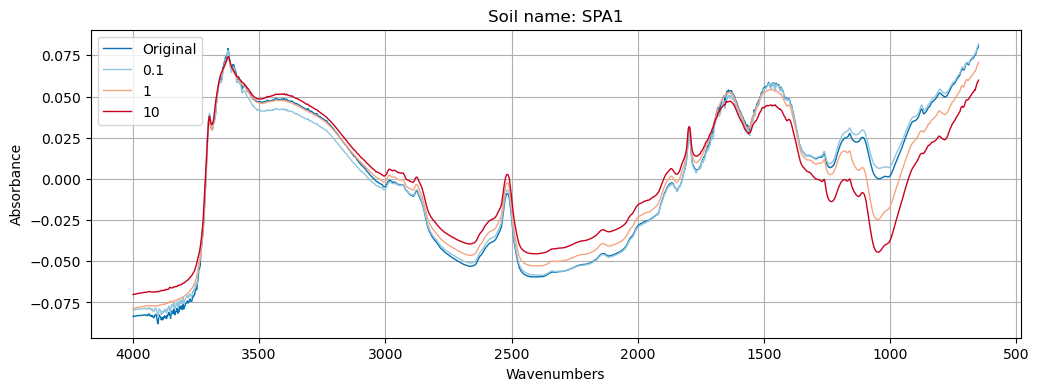

In [107]:
colors = ['#ca0020','#f4a582','#92c5de','#0571b0'][::-1]
labels = ['Original', '0.1', '1', '10']

fig, ax = plt.subplots(figsize=(12, 4))
for i in range(X_sample.shape[0]):
    ax.plot(wavenumbers, X_sample[i], color=colors[i], label=labels[i], lw=1)

ax.invert_xaxis()
ax.xaxis.set_major_locator(plt.MultipleLocator(500))
ax.grid(True)
ax.legend()
ax.set_xlabel('Wavenumbers')
ax.set_ylabel('Absorbance')
#ax.set_xlim(xmin=5000, xmax=5500) 
#ax.set_ylim(ymin=-0.03, ymax=0.01)
ax.set_title(f'Soil name: {smp_name}')
plt.show()